# Perusahaan Taxi Sweet Lift

# Daftar Isi <a id='back'></a>

* [Pendahuluan](#intro)

* [Tahap 1. Ikhtisar Data](#data_review)
    * [1.1 Load data dan mendapatkan gambaran umum](#datarev_1)
    * [1.2 Memeriksa tipe data](#datarev_2)
    * [1.3 Memeriksa nilai yang hilang](#datarev_3)
    * [1.4 Memeriksa nilai yang terduplikasi](#datarev_4)
    * [1.5 Memeriksa gambaran seluruh kolom](#datarev_5)
    * [1.6 Memeriksa rincian data pada tiap kolom](#datarev_6)
    * [1.7 Kesimpulan](#datarev_conclusion)

* [Tahap 2. Pra-pemrosesan data](#data_preprocessing)
    * [2.1 Menghapus kolom yang tidak diperlukan](#dataprep_1)
    * [2.2 Menangani missing value dan nilai yang tidak proper](#dataprep_2)
    * [2.3 Menangani duplicated value](#dataprep_3)
    * [2.4 Mempersiapkan data untuk train model](#dataprep_4)
    * [2.5 Kesimpulan](#dataprep_conclusion)    
    
* [Tahap 3. Analisis](#analysis)
    * [3.1 Train Model](#analysis_1)
    * [3.1.1 Model Linear Regression](#analysis_1_1)
    * [3.1.2 Model Decision Tree Regressor](#analysis_1_2)
    * [3.1.3 Model Random Forest Regressor](#analysis_1_3)
    * [3.1.4 Model LGBM Regressor](#analysis_1_4)
    * [3.1.5 Model Cat Boost Regressor](#analysis_1_5)
    * [3.1.6 XGB Regressor](#analysis_1_6)
    * [3.2 Kesimpulan](#analysis_conclusion)

* [Tahap 4. Pengujian](#test)
    * [4.1 Kesimpulan](#test_conclusion)

* [Temuan](#end)

[Kembali ke Daftar Isi](#back)

# Pendahuluan <a id='intro'></a>

Perusahaan Taksi Sweet Lift telah mengumpulkan data historis order taxi di bandara. Untuk menarik lebih banyak pengemudi pada jam sibuk, peneliti perlu memperkirakan jumlah order taxi untuk satu jam berikutnya. Peneliti perlu membangun model untuk prediksi hal tersebut. Sebagai catatan, metrik RMSE pada set test tidak boleh lebih dari 48.


### Tujuan: 
Pada kasus ini, tugas peneliti adalah membuat suatu model yang mampu memprdiksi pengemudi taxi pada jam sibuk.


### Tahapan:
Peneliti memiliki data terkait para klien yang disimpan dalam *file*:
- /datasets/taxi.csv

Tahapan yang perlu dilakukan adalah sebagai berikut:
1. Mengunduh data dan melakukan sampel ulang dalam waktu satu jam.
2. Melakukan analisis data.
3. Melatih model yang berbeda dengan hyperparameter berbeda. Sampel uji harus 10% dari kumpulan data awal.
4. Melakukan pengujian data dengan menggunakan sampel uji dan memberikan kesimpulan.


**Target**
- num_orders — jumlah order


Tidak ada informasi terkait kualitas data tersebut, jadi perlu diperiksa terlebih dahulu sebelum melakukan analisis lebih lanjut.

Pertama akan dilakukan evaluasi kualitas data dan melihat apakah terdapat hal yang signifikan yang perlu dilakukan tindak lanjut sebelum dilakukan proses analisis.

Proyek ini akan terdiri dari empat tahap:
 1. Ikhtisar Data
 2. Pra-pemrosesan Data 
 3. Analisis
 4. Pengujian

[Kembali ke Daftar Isi](#back)


# Tahap 1. Ikhtisar Data <a id='data_review'></a>

Melakukan import library yang diperlukan, membuka data terkait yang akan dievaluasi, kemudian menjelajahi data tersebut.

**Step 1.1**
Melakukan import libraries dan modules yang diperlukan. Untuk libraries catboost, lightgbm, dan xgboost, perlu diinstall terlebih dahulu.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error, make_scorer
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from pylab import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose

sns.set_style("darkgrid")
rcParams['figure.figsize'] = 12,6
warnings.filterwarnings('ignore')

## Load data dan mendapatkan gambaran umum <a name='datarev_1'></a>

**Step 1.2**
Melakukan load data yang diperlukan dari file *taxi.csv* dan menyimpan ke
dalam dataframe df

In [2]:
try:
    df = pd.read_csv('taxi.csv')
except:
    df = pd.read_csv('/datasets/taxi.csv')
#membaca file csv dan konversi ke dataframe df

df.shape
#melihat ukuran dataframe df

(26496, 2)

In [3]:
df.head()

,datetime,num_orders
0,2018-03-01 00:00:00,9
1,2018-03-01 00:10:00,14
2,2018-03-01 00:20:00,28
3,2018-03-01 00:30:00,20
4,2018-03-01 00:40:00,32


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   datetime    26496 non-null  object
 1   num_orders  26496 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 414.1+ KB


## Memeriksa tipe data <a name='datarev_2'></a>

**Step 1.3**
Melihat tipe data seluruh kolom dalam dataframe df untuk memeriksa kesuaian tipe data dengan isi data

In [5]:
df.dtypes

datetime      object
num_orders     int64
dtype: object

## Memeriksa nilai yang hilang <a name='datarev_3'></a>

**Step 1.4**
Melakukan pemeriksaan missing value pada dataframe df

In [6]:
df.isna().sum()

datetime      0
num_orders    0
dtype: int64

## Memeriksa nilai yang terduplikasi <a name='datarev_4'></a>

**Step 1.5**
Melakukan pemeriksaan duplicated value pada dataframe df

In [7]:
df.duplicated().sum()

0

## Memeriksa gambaran seluruh kolom <a name='datarev_5'></a>

In [8]:
df.describe()

,num_orders
count,26496.000000
mean,14.070463
std,9.211330
min,0.000000
25%,8.000000
50%,13.000000
75%,19.000000
max,119.000000


## Kesimpulan <a name="datarev_conclusion"></a>

- Data terdiri dari 26496 baris dan 2 kolom yaitu datetime dan num_orders
- Tipe data kolom tanggal harus berupa tipe data datetime
- Tidak ada nilai yang hilang
- Tidak ada nilai yang terduplikasi

# Tahap 2. Pra-pemrosesan Data <a id='data_preprocessing'></a>

**Step 2.1**
Memeriksa gambaran umum dari kolom pada dataframe df untuk mendeteksi secara cepat anomali yang terjadi

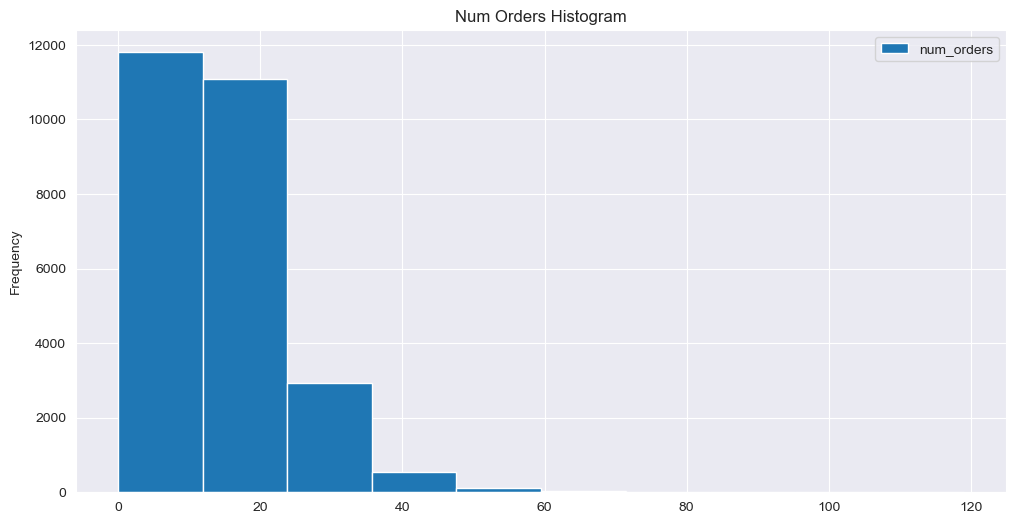

In [9]:
df.plot(kind='hist')
plt.title('Num Orders Histogram')
plt.show()

Distribusi miring ke kanan (right skewed)

**Step 2.2**
Melakukan hal sebagai berikut:
- Melakukan parsing tipe data tanggal menjadi datetime
- Mengatur indeks tabel mengacu pada kolom Datetime

In [10]:
try:
    df = pd.read_csv('taxi.csv', index_col=[0], parse_dates=[0])
except:
    df = pd.read_csv('/datasets/taxi.csv', index_col=[0], parse_dates=[0])

In [11]:
df.head()

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32


**Step 2.2**
Memeriksa apakah index dalam kondisi terurut

In [12]:
df.index.is_monotonic_increasing

True

## Kesimpulan <a name="dataprep_conclusion"></a>

- Data memiliki distribusi yang miring ke kanan (right skewed), dengan sebagian besar waktu penumpang naik taxi antara 10-20, dan beberapa kali terjadi pada lebih dari 20.
- Tipe data tanggal telah dilakukan parsing menjadi datetime
- Indeks tabel telah diset mengacu pada kolom Datetime
- Indeks telah berada dalam kondisi terurut naik

[Kembali ke Daftar Isi](#back)

# Tahap 3. Analisis <a name='analysis'></a>

**Step 3.1**
Melakukan resampling untuk 1 jam, 1 pekan, dan 1 bulan

In [13]:
df_monthly = df.resample('1M').sum()
df_weekly = df.resample('1W').sum()
df_hourly = df.resample('1H').sum()

**Step 3.2**
Menampilkan grafik statistik order yang dikelompokkan berdasarkan bulan

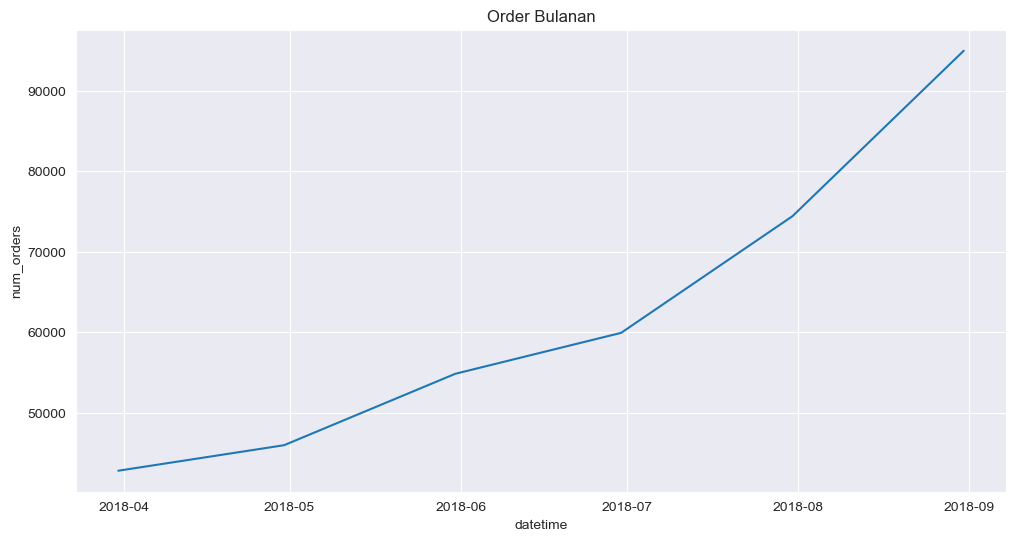

In [14]:
sns.lineplot(x=df_monthly.index,y=df_monthly['num_orders'])
plt.title('Order Bulanan')
plt.show()

**Step 3.3**
Menampilkan grafik statistik order yang dikelompokkan berdasarkan pekan

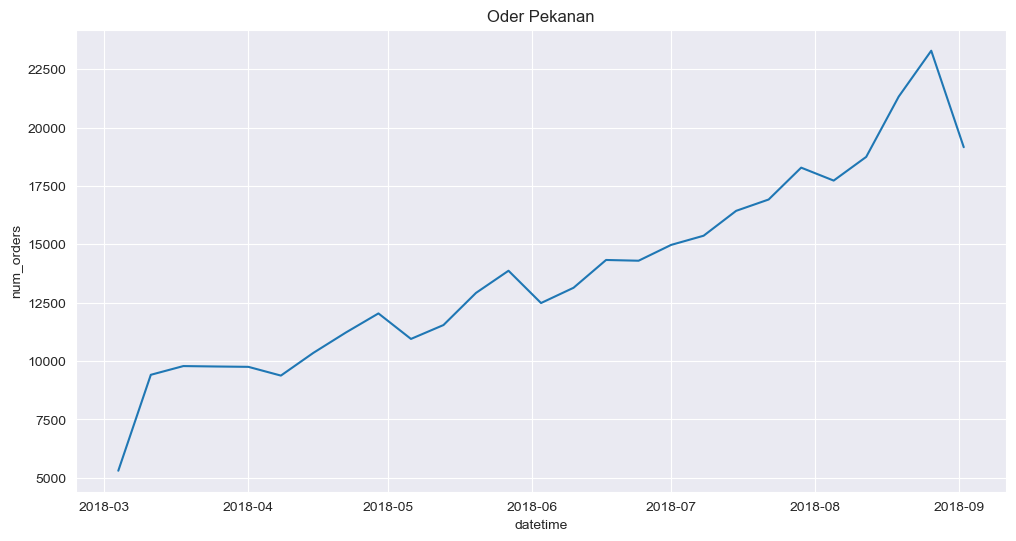

In [15]:
sns.lineplot(x=df_weekly.index,y=df_weekly['num_orders'])
plt.title('Oder Pekanan')
plt.show()

**Step 3.4**
Menampilkan grafik statistik order yang dikelompokkan berdasarkan jam

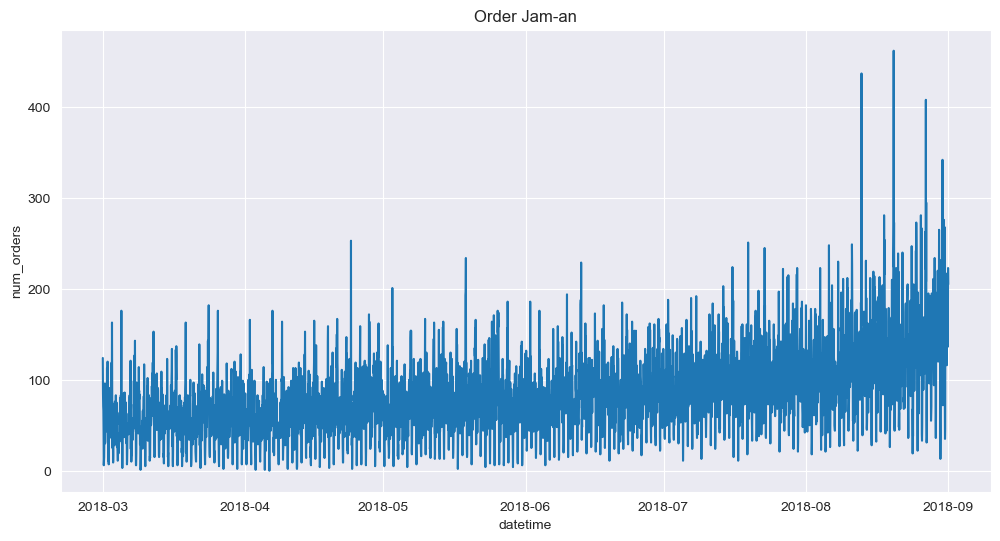

In [16]:
sns.lineplot(x=df_hourly.index,y=df_hourly['num_orders'])
plt.title('Order Jam-an')
plt.show()

**Step 3.5**
Menampilkan grafik lainnya dari statistik order yang dikelompokkan berdasarkan jam

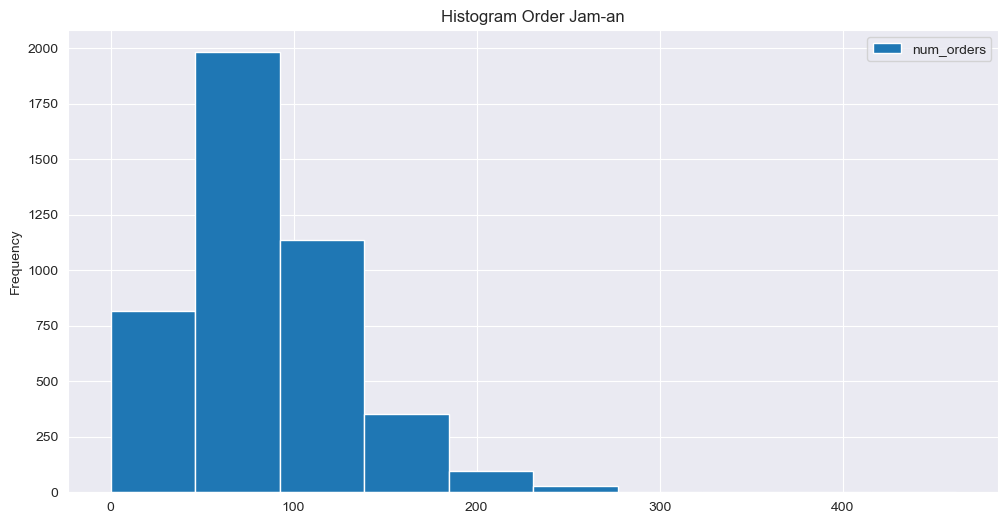

In [17]:
df_hourly.plot(kind='hist')
plt.title('Histogram Order Jam-an')
plt.show()

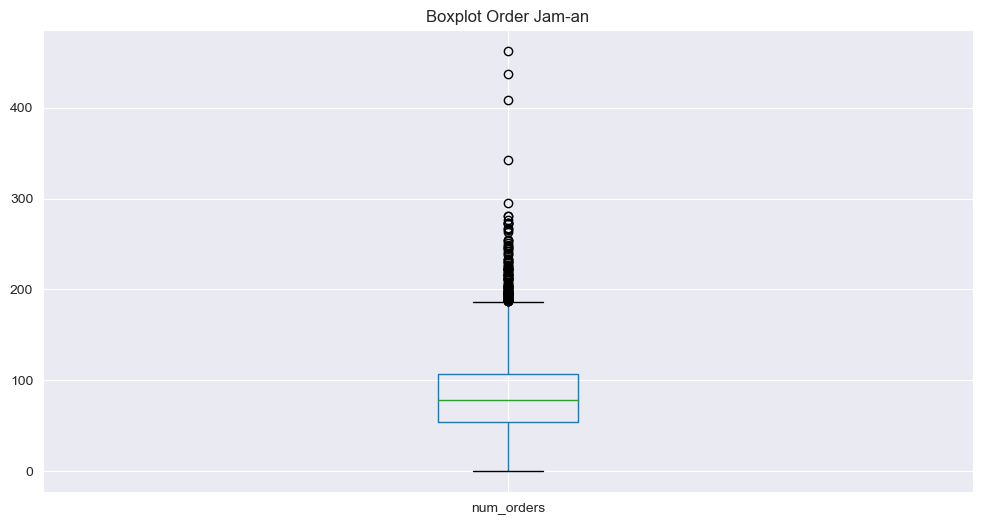

In [18]:
df_hourly.boxplot()
plt.title('Boxplot Order Jam-an')
plt.show()

In [19]:
df_hourly.describe()

,num_orders
count,4416.000000
mean,84.422781
std,45.023853
min,0.000000
25%,54.000000
50%,78.000000
75%,107.000000
max,462.000000


- Secara umum dapat dikatakan bahwa trendnya meningkat, semakin banyak orang yang memesan taksi
- Order tergantung pada jam dalam satu hari, ditengarai order taxi bersifat musiman
- Varians antar jam terlihat tinggi
- Distribusinya miring ke kanan (right skewed), median lebih rendah dari mean
- Order rata-ratanya adalah 85 dan sebagian besar waktu order antara 55-105 dan beberapa kali lebih dari 180 dengan beberapa kelompok jam antara 180-300 order per jam

**Step 3.6**
Menghitung rata-rata bergerak dan standar deviasi bergerak

<Axes: xlabel='datetime'>

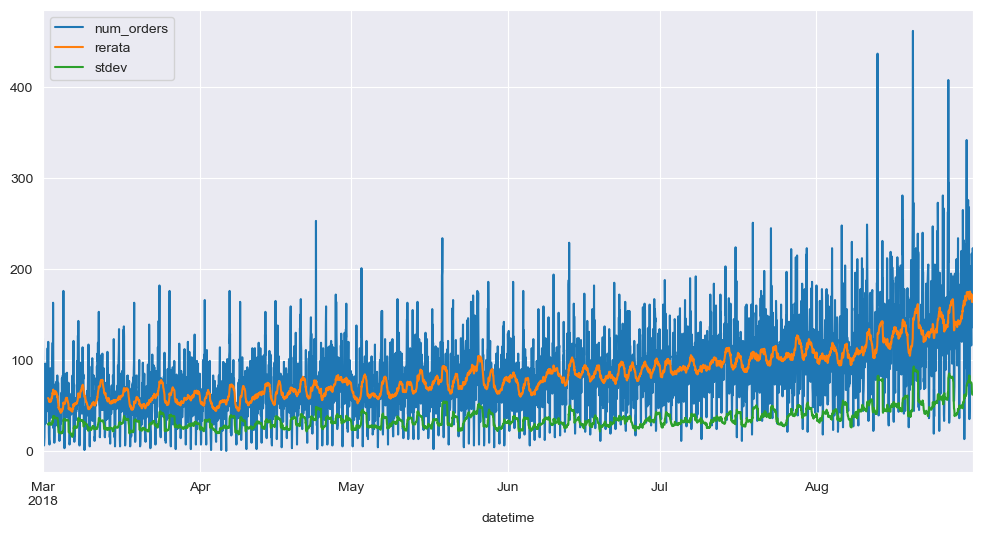

In [20]:
df_hourly['rerata'] = df_hourly['num_orders'].rolling(25).mean()
df_hourly['stdev'] = df_hourly['num_orders'].rolling(25).std()
df_hourly.plot()

In [21]:
df_plot = df.copy()
df_plot = df_plot.resample('1H').sum()
df_plot['rolling_mean'] = df_plot['num_orders'].shift().rolling(12).mean()
df_plot['std'] = df_plot['num_orders'].rolling(12).std()
df_plot = df_plot.dropna()

In [22]:
# Mengingat fungsi seasonal_decompose(df) tidak dapat memanggil seluruh kolom melainkan hanya satu
# Apabila menjalankan: df_decomposed = seasonal_decompose(df_plot)
# TypeError: Index(...) must be called with a collection of some kind, 'seasonal' was passed
# maka untuk menampilkan hasil seasonal_decompose(df) dari seluruh kolom 
# digunakan fungsi alternatif sebagai berikut:

def season_decom(df, model='additive'):    
    return pd.concat([pd.DataFrame({col: seasonal_decompose(df[col], model=model).trend}) for col in df.columns], axis=1)

df_decomposed = season_decom(df_plot)

In [23]:
df_decomposed = df_decomposed.dropna()

In [24]:
df_decomposed

,num_orders,rolling_mean,std
datetime,,,
2018-03-02 00:00:00,54.833333,56.071181,28.274537
2018-03-02 01:00:00,55.229167,55.963542,28.347161
2018-03-02 02:00:00,55.416667,55.887153,28.269237
2018-03-02 03:00:00,55.187500,55.758681,28.164590
2018-03-02 04:00:00,55.854167,55.607639,28.094756
...,...,...,...
2018-08-31 07:00:00,166.208333,171.006944,72.738477
2018-08-31 08:00:00,167.791667,170.411458,71.118104
2018-08-31 09:00:00,167.229167,169.907986,69.470822


<Axes: title={'center': 'Trend'}, xlabel='datetime'>

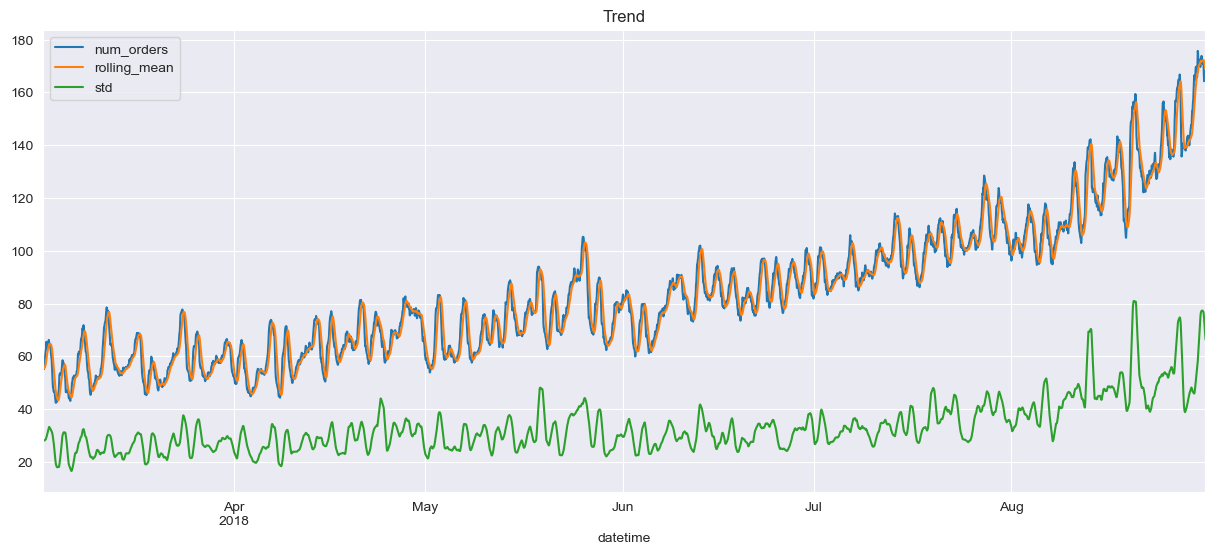

In [25]:
df_decomposed.plot(title='Trend', figsize=(15,6))

<Figure size 1500x600 with 0 Axes>

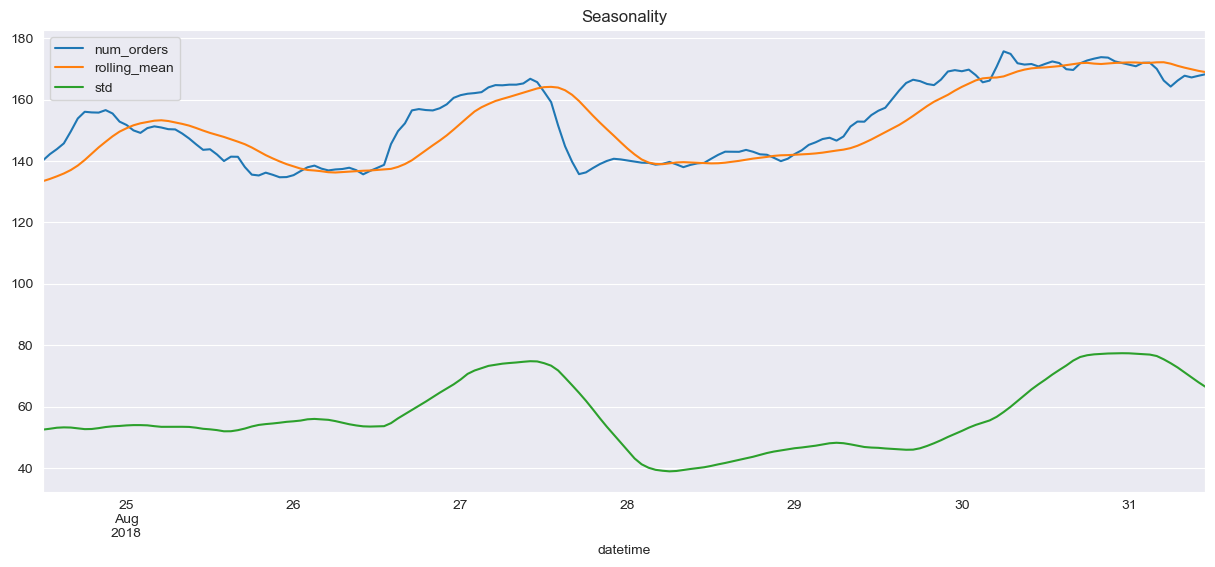

<Figure size 1500x600 with 0 Axes>

In [26]:
df_decomposed.tail(24*7).plot(title='Seasonality', figsize=(15,6))
plt.figure(figsize=(15, 6))

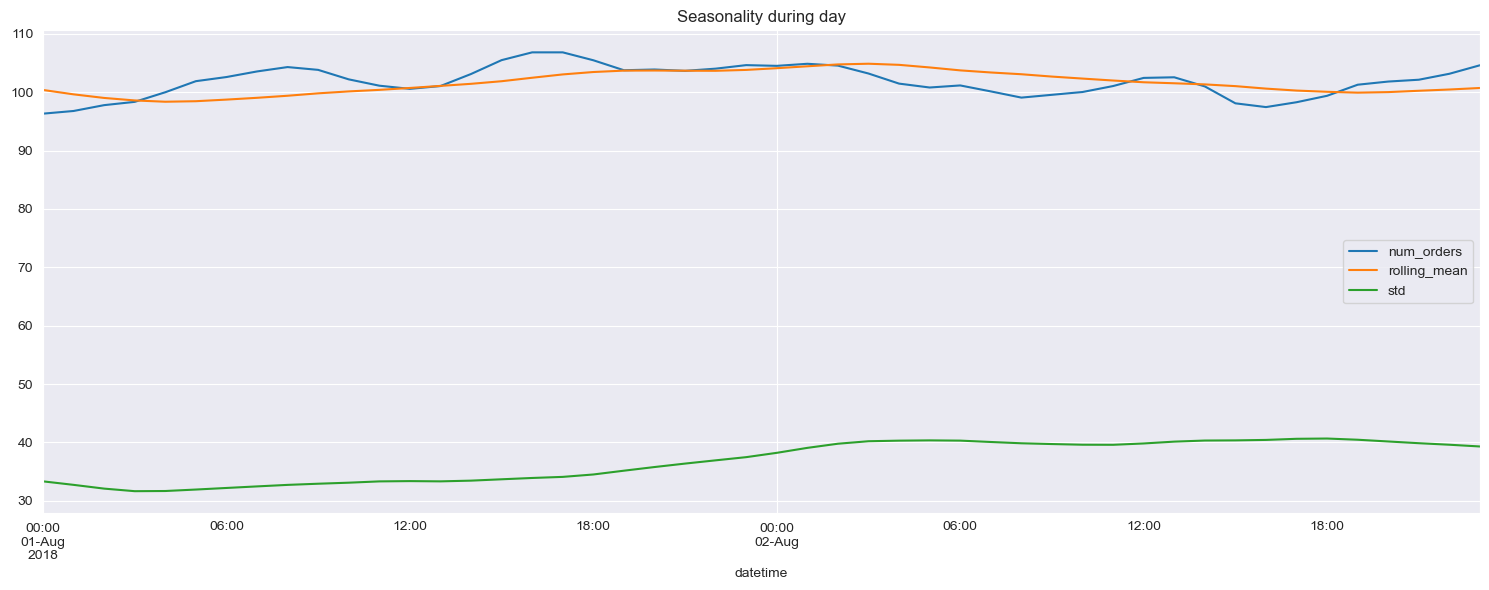

In [27]:
df_decomposed['2018-08-01':'2018-08-02'].plot(ax=plt.gca(), figsize=(15,6))
plt.title('Seasonality during day')
plt.tight_layout()

## Kesimpulan <a name="analysis_conclusion"></a>

- Berdasakan grafik Trend dapat diketahui bahwa jumlah order meningkat secara bertahap
- Berdasarkan grafik Seasonality yang dibagi berdasarkan pekan menunjukkan jumlah pesanan di tengah pekan lebih sedikit dibandingkan hari lainnya.
- Berdasarkan grafik Seasonality yang dibagi berdasarkan jam menunjukkan jumlah order pada pagi hari jauh lebih sedikit dibandingkan waktu lainnya, begitu pula pada saat tengah hari menuju sore hari lebih sedikit dibandingkan waktu lainnya.

[Kembali ke Daftar Isi](#back)

# Tahap 4. Pengujian <a name="test"></a>

**Step 4.1** Melakukan pelatihan model menggunakan resampling untuk 1 jam

In [28]:
df = df.resample('1H').sum()

**Step 4.2** Membuat feature

In [29]:
def make_features(data, max_lag, rolling_mean_size):
    data['dayofweek'] = data.index.dayofweek
    data['hour'] = data.index.hour
    
    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data['num_orders'].shift(lag)

    data['rolling_mean'] = data['num_orders'].shift().rolling(rolling_mean_size).mean()

make_features(df, 9, 9)

In [30]:
df.describe()

,num_orders,dayofweek,hour,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,rolling_mean
count,4416.000000,4416.000000,4416.00000,4415.000000,4414.000000,4413.000000,4412.000000,4411.000000,4410.000000,4409.000000,4408.000000,4407.000000,4407.000000
mean,84.422781,3.005435,11.50000,84.395470,84.364069,84.347156,84.331369,84.319655,84.291837,84.261737,84.236162,84.228954,84.320198
std,45.023853,1.990684,6.92297,44.992356,44.949043,44.940088,44.932942,44.931299,44.898387,44.858959,44.831888,44.834421,30.263125
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.888889
25%,54.000000,1.000000,5.75000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,62.555556
50%,78.000000,3.000000,11.50000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,79.888889
75%,107.000000,5.000000,17.25000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,101.111111
max,462.000000,6.000000,23.00000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,223.111111


**Step 4.3** Melakukan split data ke set train dan set test

In [31]:
train, test = train_test_split(df, shuffle=False, test_size=0.1)
train = train.dropna()

**Step 4.4** Menetapkan feature dan target untuk set train dan set test

In [32]:
X_train = train.drop(['num_orders'], axis=1)
y_train = train['num_orders']
X_test = test.drop(['num_orders'],axis=1)
y_test = test['num_orders']

In [33]:
train.head()

,num_orders,dayofweek,hour,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,rolling_mean
datetime,,,,,,,,,,,,,
2018-03-01 09:00:00,69,3,9,34.0,15.0,12.0,6.0,43.0,66.0,71.0,85.0,124.0,50.666667
2018-03-01 10:00:00,64,3,10,69.0,34.0,15.0,12.0,6.0,43.0,66.0,71.0,85.0,44.555556
2018-03-01 11:00:00,96,3,11,64.0,69.0,34.0,15.0,12.0,6.0,43.0,66.0,71.0,42.222222
2018-03-01 12:00:00,30,3,12,96.0,64.0,69.0,34.0,15.0,12.0,6.0,43.0,66.0,45.000000
2018-03-01 13:00:00,32,3,13,30.0,96.0,64.0,69.0,34.0,15.0,12.0,6.0,43.0,41.000000


In [34]:
test.head()

,num_orders,dayofweek,hour,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,rolling_mean
datetime,,,,,,,,,,,,,
2018-08-13 14:00:00,102,0,14,119.0,92.0,144.0,156.0,137.0,91.0,39.0,66.0,83.0,103.000000
2018-08-13 15:00:00,175,0,15,102.0,119.0,92.0,144.0,156.0,137.0,91.0,39.0,66.0,105.111111
2018-08-13 16:00:00,144,0,16,175.0,102.0,119.0,92.0,144.0,156.0,137.0,91.0,39.0,117.222222
2018-08-13 17:00:00,152,0,17,144.0,175.0,102.0,119.0,92.0,144.0,156.0,137.0,91.0,128.888889
2018-08-13 18:00:00,104,0,18,152.0,144.0,175.0,102.0,119.0,92.0,144.0,156.0,137.0,135.666667


In [35]:
print('Ukuran set train:', X_train.shape)
print('Ukuran set test:', X_test.shape)

Ukuran set train: (3965, 12)
Ukuran set test: (442, 12)


### Uji Regressor

**Step 4.5** Melakukan pengujian regressor Linear Regression

#### LinearRegression

In [36]:
%%time
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_predictions = lr.predict(X_test)
print('RMSE:', mean_squared_error(y_test, lr_predictions)**0.5)

RMSE: 54.02972716103852
CPU times: total: 125 ms
Wall time: 15.8 ms


**Step 4.6** Melakukan pengujian regressor Decision Tree

#### Decision Tree Regressor

In [37]:
%%time
dtr = DecisionTreeRegressor(random_state=12345)
dtr.fit(X_train,y_train)
dtr_predictions = dtr.predict(X_test)
print('RMSE:', mean_squared_error(y_test, dtr_predictions)**0.5)

RMSE: 63.54485001792754
CPU times: total: 625 ms
Wall time: 71.1 ms


**Step 4.7** Melakukan pengujian regressor Random Forest

#### Random Forest Regressor

In [38]:
%%time
rfr = RandomForestRegressor(random_state=12345)
rfr.fit(X_train,y_train)
rfr_predictions = rfr.predict(X_test)
print('RMSE:', mean_squared_error(y_test, rfr_predictions)**0.5)

RMSE: 46.27198349010552
CPU times: total: 7.14 s
Wall time: 6.39 s


**Step 4.8** Melakukan pengujian regressor Extreme Gradient Boosting

#### XGBRegressor

In [39]:
%%time
xgb = XGBRegressor()
xgb.fit(X_train,y_train)
xgb_predictions = xgb.predict(X_test)
print('RMSE:', mean_squared_error(y_test, xgb_predictions)**0.5)

RMSE: 48.153793966992914
CPU times: total: 2 s
Wall time: 1.29 s


**Step 4.9** Melakukan pengujian regressor Category Boosting

#### CatBoostRegressor

In [40]:
%%time
cbr = CatBoostRegressor(loss_function="RMSE", verbose=False,random_state=12345)
cbr.fit(X_train,y_train)
cbr_predictions = cbr.predict(X_test)
print('RMSE:', mean_squared_error(y_test, cbr_predictions)**0.5)

RMSE: 43.96511717200771
CPU times: total: 22.4 s
Wall time: 2.16 s


**Step 4.10** Melakukan pengujian regressor Light Gradient Boosting

#### LGBM Regressor

In [41]:
%%time
lgbm = LGBMRegressor(random_state=12345,force_col_wise=True)
lgbm.fit(X_train,y_train)
lgbm_predictions = lgbm.predict(X_test)
print('RMSE:', mean_squared_error(y_test, lgbm_predictions)**0.5)

[LightGBM] [Info] Total Bins 1996
[LightGBM] [Info] Number of data points in the train set: 3965, number of used features: 12
[LightGBM] [Info] Start training from score 78.353342
RMSE: 43.820303611464006
CPU times: total: 516 ms
Wall time: 170 ms


Model terbaik berdasarkan nilai RMSE dan waktu adalah LGBM Regressor, untuk selanjutnya akan dilakukan cross validation dengan TimeSeriesSplit

**Step 4.11** Melakukan cross validation dengan TimeSeriesSplit

In [42]:
param_grid = {
    'n_estimators' : [50,100,200,300,350],
    'num_leaves' : [2,5,7,12]
}
lgbm_model = LGBMRegressor(random_state=12345, objective='regression',force_col_wise=True)
def rmse_error(y_true, y_pred):
    return mean_squared_error(y_true, y_pred)**0.5
rmse_score = make_scorer(rmse_error, greater_is_better = False)
tscv = TimeSeriesSplit(n_splits=5)
clf = GridSearchCV(estimator = lgbm, scoring=rmse_score, param_grid=param_grid, cv=tscv).fit(X_train,y_train)
best_params = clf.best_params_
print(best_params)
print(clf.best_score_)

[LightGBM] [Info] Total Bins 1161
[LightGBM] [Info] Number of data points in the train set: 665, number of used features: 12
[LightGBM] [Info] Start training from score 57.336842
[LightGBM] [Info] Total Bins 1429
[LightGBM] [Info] Number of data points in the train set: 1325, number of used features: 12
[LightGBM] [Info] Start training from score 59.294340
[LightGBM] [Info] Total Bins 1573
[LightGBM] [Info] Number of data points in the train set: 1985, number of used features: 12
[LightGBM] [Info] Start training from score 63.375819
[LightGBM] [Info] Total Bins 1699
[LightGBM] [Info] Number of data points in the train set: 2645, number of used features: 12
[LightGBM] [Info] Start training from score 67.671834
[LightGBM] [Info] Total Bins 1843
[LightGBM] [Info] Number of data points in the train set: 3305, number of used features: 12
[LightGBM] [Info] Start training from score 72.498638
[LightGBM] [Info] Total Bins 1161
[LightGBM] [Info] Number of data points in the train set: 665, numb

[LightGBM] [Info] Total Bins 1699
[LightGBM] [Info] Number of data points in the train set: 2645, number of used features: 12
[LightGBM] [Info] Start training from score 67.671834
[LightGBM] [Info] Total Bins 1843
[LightGBM] [Info] Number of data points in the train set: 3305, number of used features: 12
[LightGBM] [Info] Start training from score 72.498638
[LightGBM] [Info] Total Bins 1161
[LightGBM] [Info] Number of data points in the train set: 665, number of used features: 12
[LightGBM] [Info] Start training from score 57.336842
[LightGBM] [Info] Total Bins 1429
[LightGBM] [Info] Number of data points in the train set: 1325, number of used features: 12
[LightGBM] [Info] Start training from score 59.294340
[LightGBM] [Info] Total Bins 1573
[LightGBM] [Info] Number of data points in the train set: 1985, number of used features: 12
[LightGBM] [Info] Start training from score 63.375819
[LightGBM] [Info] Total Bins 1699
[LightGBM] [Info] Number of data points in the train set: 2645, num

[LightGBM] [Info] Total Bins 1429
[LightGBM] [Info] Number of data points in the train set: 1325, number of used features: 12
[LightGBM] [Info] Start training from score 59.294340
[LightGBM] [Info] Total Bins 1573
[LightGBM] [Info] Number of data points in the train set: 1985, number of used features: 12
[LightGBM] [Info] Start training from score 63.375819
[LightGBM] [Info] Total Bins 1699
[LightGBM] [Info] Number of data points in the train set: 2645, number of used features: 12
[LightGBM] [Info] Start training from score 67.671834
[LightGBM] [Info] Total Bins 1843
[LightGBM] [Info] Number of data points in the train set: 3305, number of used features: 12
[LightGBM] [Info] Start training from score 72.498638
[LightGBM] [Info] Total Bins 1996
[LightGBM] [Info] Number of data points in the train set: 3965, number of used features: 12
[LightGBM] [Info] Start training from score 78.353342
{'n_estimators': 100, 'num_leaves': 12}
-25.92162843485348


- Regresor LightGBM menunjukkan hasil terbaik pada set train dengan RMSE terbaik dan waktu terbaik, langkah selanjutnya akan digunakan model ini
- Dengan menggunakan TimeSeriesSplit dengan n_splits = 5 untuk validasi silang menggunakan GridSearchCV pada model regressor LGBM untuk mendapatkan parameter terbaik dan skor terbaik untuk digunakan dalam pengujian

### Uji Model

**Step 4.12** Melakukan pengujian model

In [43]:
%%time
model = LGBMRegressor(**best_params,force_col_wise=True)
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print('RMSE pada set test:', mean_squared_error(y_test, predictions)**0.5)

[LightGBM] [Info] Total Bins 1996
[LightGBM] [Info] Number of data points in the train set: 3965, number of used features: 12
[LightGBM] [Info] Start training from score 78.353342
RMSE pada set test: 45.04654574997148
CPU times: total: 250 ms
Wall time: 33.8 ms


Pengujian ini menggunakan TimeSeriesSplit dengan n_splits = 5 untuk cross validation menggunakan GridSearchCV pada pelatihan model untuk mendapatkan parameter terbaik dan skor terbaik yang digunakan pada pengujian

### Feature Importance


**Step 4.13** Menampilkan grafik Feature Importance

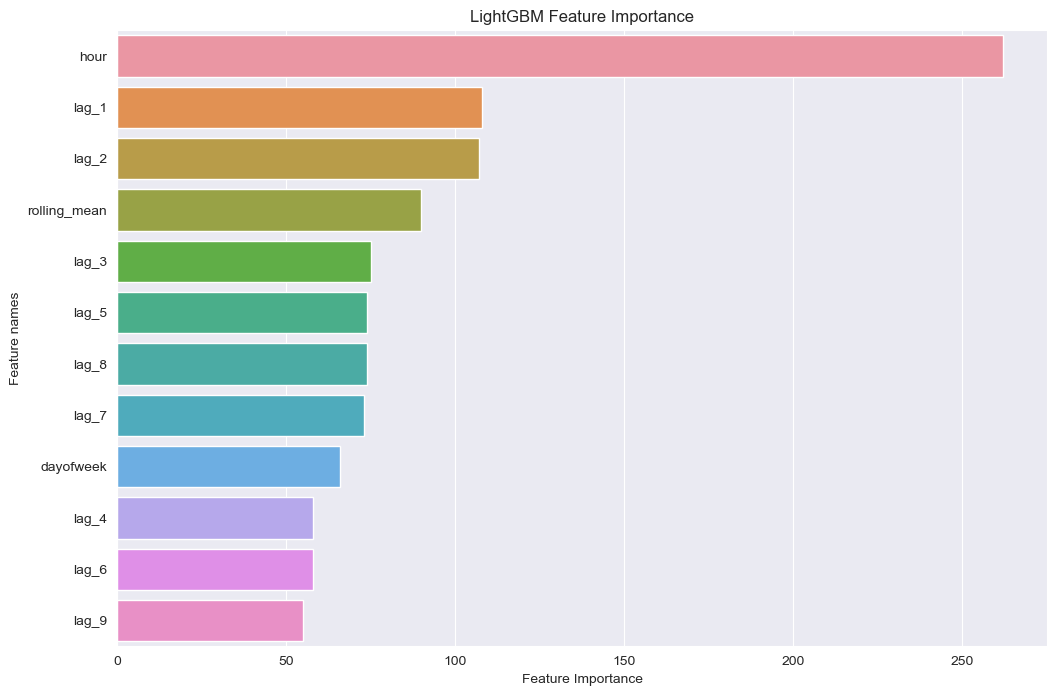

In [44]:
feature_importance = np.array(model.feature_importances_)
feature_names = np.array(X_test.columns)

#Membuat dataFrame menggunakan dictionary
data={'feature_names':feature_names,'feature_importance':feature_importance}
df_fi = pd.DataFrame(data)

#Mengurutkan ataFrame dalam urutan menurun mengacu pada feature importance
df_fi.sort_values(by=['feature_importance'], ascending=False,inplace=True)

plt.figure(figsize=(12,8))
sns.barplot(x=df_fi['feature_importance'], y=df_fi['feature_names'])
plt.title('LightGBM Feature Importance')
plt.xlabel('Feature Importance')
plt.ylabel('Feature names')
plt.show()

Pada grafik ditampilkan jumlah order sebenarnya per hari dan yang diprediksikan oleh model.

In [45]:
orders_real = y_test.copy()
orders_predictions = pd.DataFrame(data = predictions, columns = ['predictions'], index = X_test.index.copy())
df_result = pd.merge(orders_real, orders_predictions, how = 'left', left_index = True, right_index = True)

In [46]:
df_result.sample(5)

,num_orders,predictions
datetime,,
2018-08-23 14:00:00,112,102.721099
2018-08-14 20:00:00,84,98.338771
2018-08-13 21:00:00,160,103.267164
2018-08-28 21:00:00,189,118.551468
2018-08-26 05:00:00,40,61.176361


In [47]:
df_result['predictions'] = df_result['predictions'].astype('int64')
df_result['predictions']

datetime
2018-08-13 14:00:00    102
2018-08-13 15:00:00    108
2018-08-13 16:00:00    122
2018-08-13 17:00:00    122
2018-08-13 18:00:00    111
                      ... 
2018-08-31 19:00:00    136
2018-08-31 20:00:00    136
2018-08-31 21:00:00    140
2018-08-31 22:00:00    142
2018-08-31 23:00:00    143
Freq: H, Name: predictions, Length: 442, dtype: int64

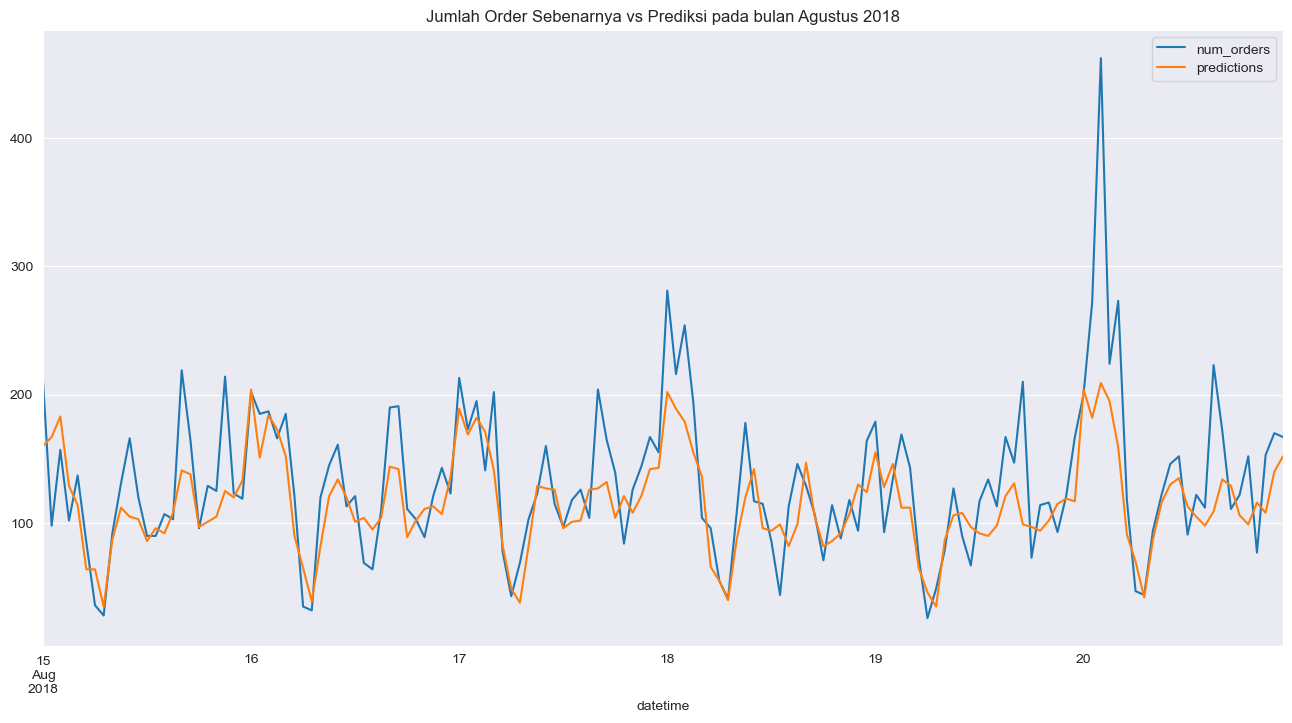

In [48]:
df_result['2018-08-15':'2018-08-20'].plot(figsize=(16,8))
plt.title('Jumlah Order Sebenarnya vs Prediksi pada bulan Agustus 2018')
plt.show()

## Kesimpulan <a name="test_conclusion"></a>

- Hasil pengujian model memperlihatkan bahwa model telah cukup sesuai dengan order sebenarnya
- Kita mendapatkan hasil RMSE terbaik sebesar 45,05 pada sampel uji dari model Regresor LGBM, menggunakan parameter terbaik dari pelatihan model saat melakukan cross validation TimeSeriesSplit,  dengan hasil waktu berjalan cepat yakni 250 ms.

[Kembali ke Daftar Isi](#back)

# Temuan <a name="end"></a>

- Berdasarkan hasil analisis dan pengujian model dapat disimpulkan bahwa trend order taxi sedang naik.
- Jumlah order pada pagi hari jauh lebih sedikit dibandingkan waktu lainnya, sjumlah order pada pagi hari jauh lebih sedikit dibandingkan waktu lainnya, begitu pula pada saat tengah hari menuju sore hari lebih sedikit dibandingkan waktu lainnya.
- Jumlah pesanan di tengah pekan lebih sedikit dibandingkan hari lainnya.
- Secara umum model Regresor LGBM kami memiliki hasil yang cukup bagus dan proses yang cepat, dan cukup sesuai dengan nilai order yang sebenarnya.